#Install library

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 37.9 MB/s 
     |████████████████████████████████| 381 kB 19.5 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


#Import library

In [ ]:
from livelossplot import PlotLossesKerasTF
from keras.datasets import mnist
#%config Completer.use_jedi = False
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow as tf
#Train the model
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Collect Data

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train / 255.
X_test  = X_test  / 255.    # standardize the data for train and test to be between 0-1

### Convert Output label to multiple values

In [ ]:
# one hot encoding outcome
target_train = to_categorical(Y_train)
target_test  = to_categorical(Y_test)

# Build the Graph

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Conv2D, Conv2DTranspose, Conv1D, MaxPool2D, Flatten
from tensorflow.keras import Model

In [ ]:
target_train.shape

(60000, 10)

In [ ]:
input_img = Input(shape=(10),
#    batch_size=100,
    name="test",
    dtype=np.float32,
    )

In [ ]:
flatten_input = Dense(784, activation="relu")(input_img)
reshape_input = Reshape((28, 28, 1), input_shape=(784,))(flatten_input)
conv_2d_trans = Conv2DTranspose(32, kernel_size=3, activation='relu')(reshape_input)
conv_2d_trans = Conv2DTranspose(64, kernel_size=3, activation='relu')(conv_2d_trans)
flatten_layer = Flatten()(conv_2d_trans)
decoder       = Dense(784, activation="sigmoid")(flatten_layer)
decoder       = Reshape((28, 28, 1), input_shape=(784,))(decoder)

In [ ]:
decoder_model = Model(input_img, decoder)

In [ ]:
decoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 test (InputLayer)           [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 784)               8624      
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 30, 30, 32)       320       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 32, 32, 64)       18496     
 ranspose)                                                       
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0   

In [ ]:
decoder_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

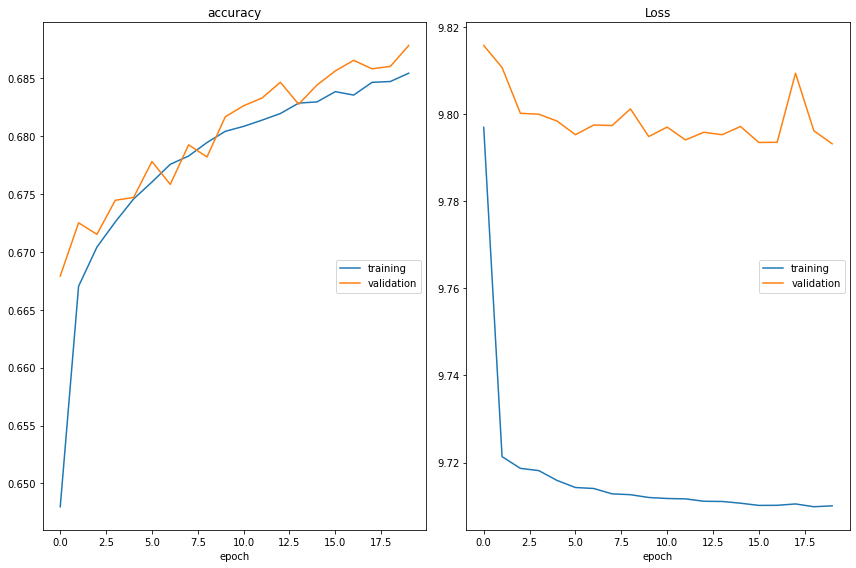

accuracy
	training         	 (min:    0.648, max:    0.685, cur:    0.685)
	validation       	 (min:    0.668, max:    0.688, cur:    0.688)
Loss
	training         	 (min:    9.710, max:    9.797, cur:    9.710)
	validation       	 (min:    9.793, max:    9.816, cur:    9.793)
600/600 [==============================] - 16s 27ms/step - loss: 9.7101 - accuracy: 0.6854 - val_loss: 9.7932 - val_accuracy: 0.6878


In [ ]:
decoder_model.fit(target_train, X_train,         
          validation_data=(target_test, X_test),
          epochs=20,
          batch_size=100,
          callbacks=[PlotLossesKerasTF()])

In [ ]:
noise_factor = 0.2
test_data = to_categorical(np.arange(10)) + noise_factor * np.random.uniform(low=0.0, high=1.0, size=(10)) 
test_data = to_categorical(np.arange(10))

In [ ]:
data_pred

array([[[[1.43092573e-01],
         [1.43817633e-01],
         [1.43090144e-01],
         ...,
         [1.42236516e-01],
         [1.43929601e-01],
         [1.42602578e-01]],

        [[5.66769904e-03],
         [5.64899901e-03],
         [5.65207796e-03],
         ...,
         [5.65483607e-03],
         [5.69356512e-03],
         [5.64436754e-03]],

        [[1.31729967e-03],
         [1.31977175e-03],
         [4.33852850e-03],
         ...,
         [8.39288067e-03],
         [1.31361489e-03],
         [1.31527067e-03]],

        ...,

        [[4.34779882e-04],
         [4.38470655e-04],
         [8.22141883e-04],
         ...,
         [1.09318295e-03],
         [1.13442936e-03],
         [4.31666675e-04]],

        [[4.23294213e-03],
         [4.22006985e-03],
         [4.23600012e-03],
         ...,
         [1.00789862e-02],
         [4.26610885e-03],
         [4.23531840e-03]],

        [[2.51870360e-02],
         [2.53073052e-02],
         [2.51642503e-02],
         ...,
 

In [ ]:
data_pred = decoder_model.predict(test_data)

In [ ]:
data_pred.shape

(10, 28, 28, 1)

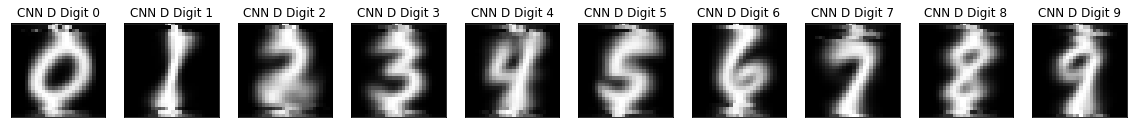

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("CNN D Digit " + str(i))
    plt.imshow(tf.squeeze(data_pred[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)